In [3]:
import gym
import numpy as np

Policy iteration algorithm consisits of there main steps

1.   Initialazation
2.   Policy Evaluation
3.   Policy Improvement



## Step 1 - Initialization
Setting up our env

In [4]:
env = gym.make("Taxi-v3")
env.discount_factor = 0.95
env.threshold = 0.05
env.num_states = 500
env.num_actions = 6
env.actions = [0,1,2,3,4,5]
env.value_function = np.zeros(env.num_states)
env.rewards = np.zeros(env.num_states)

We decided to start with uniform distribution as our policy.
2D array with probability of taking action A from state S.

In [5]:
env.policy = np.ones([env.num_states, env.num_actions]) / env.num_actions

Setting up some useful functions

In [6]:
#get current state as a list [row,col, passenger_loc, dest_loc]
def get_state(i):
  state = env.decode(i)
  list = []
  for s in state:
    list.append(s)
  return list


# return true iff we have reached the dest state and dropoff the paasenger there.
def is_terminate():
  lst = get_state(env.env.s)
  return ((lst[0],lst[1]) == env.locs[env.lst[3]]) and lst[2] == 4


env.get_state = get_state
env.is_terminate = is_terminate

## Step 2 - Policy Evaluation
repeat until converge
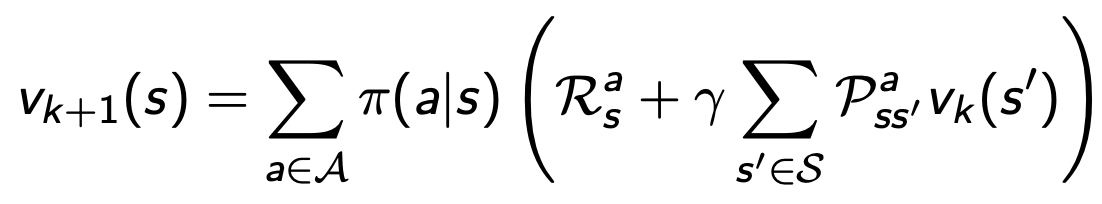 

In [7]:
def policy_evaluation():
  while True:
    delta = 0
    for state in range(env.num_states):
      new_val = 0
      for action, action_prob in zip(env.actions, env.policy[state]):
        for prob, next_state, reward, is_done in env.env.P[state][action]:
          new_val += action_prob * prob * (reward + env.discount_factor * env.value_function[next_state])
      
      delta = max(delta, np.abs(new_val - env.value_function[state]))
      env.value_function[state] = new_val
    if delta < env.threshold:
      break

env.policy_evaluation = policy_evaluation

## One-Step lookahead
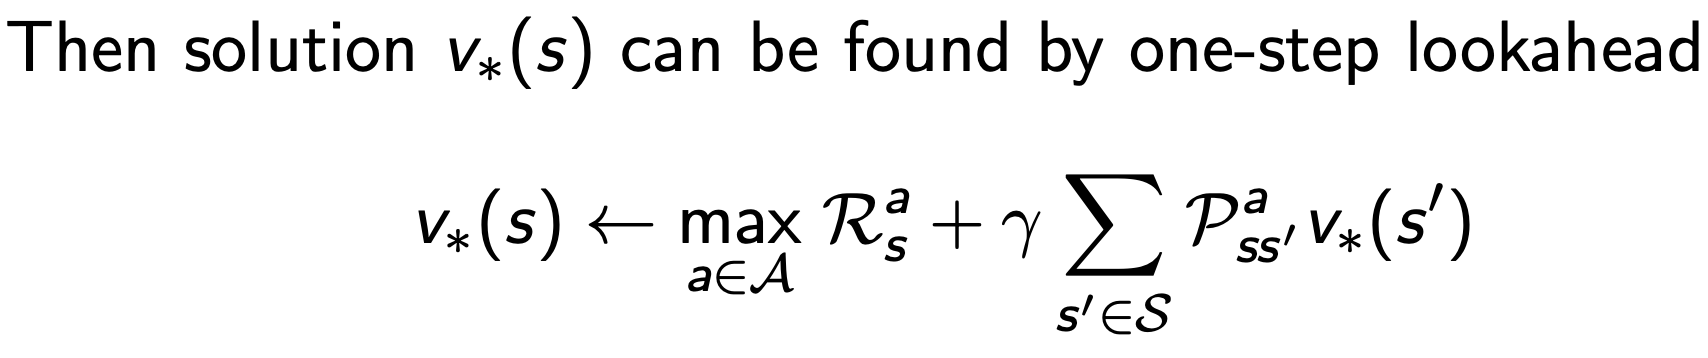

In [8]:
def one_step_lookahead(state):
  estimations = []
  for action in env.actions:
    for prob, next_state, reward, is_done in env.env.P[state][action]:
      estimations.append(prob*(reward + env.discount_factor * env.value_function[next_state]))
  return np.argmax(estimations)

env.one_step_lookahead = one_step_lookahead

## Step 3 - Policy Improvement

In [9]:
def policy_improvement():
  policy_stable = True
  for state in range(env.num_states):
    policy_action = np.argmax(env.policy[state])
    lookahead_action = env.one_step_lookahead(state)
    if policy_action != lookahead_action:
      policy_stable = False
    env.policy[state] = np.eye(env.num_actions)[lookahead_action] #update the policy to take on the best action and all the others assign them to 0
  return policy_stable

env.policy_improvement = policy_improvement

# Policy Iteration

In [10]:
policy_stable = False
while not policy_stable:
  env.policy_evaluation()
  policy_stable = env.policy_improvement()


# Simulation

In [11]:
env.reset()
reward = 0
while reward != 20:
  env.render()
  current_state = env.env.s
  _, reward, _, _ = env.step(np.argmax(env.policy[current_state]))


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:_|
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | :_|
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: 

# Check_state

In [13]:
for i in range(env.num_states):
  print('state ' + str(i)+ ": "+str(np.argmax(env.policy[i])))

state 0: 4
state 1: 4
state 2: 4
state 3: 4
state 4: 0
state 5: 0
state 6: 0
state 7: 0
state 8: 0
state 9: 0
state 10: 0
state 11: 0
state 12: 0
state 13: 0
state 14: 0
state 15: 0
state 16: 5
state 17: 0
state 18: 0
state 19: 0
state 20: 3
state 21: 3
state 22: 3
state 23: 3
state 24: 0
state 25: 0
state 26: 0
state 27: 0
state 28: 0
state 29: 0
state 30: 0
state 31: 0
state 32: 0
state 33: 0
state 34: 0
state 35: 0
state 36: 3
state 37: 0
state 38: 0
state 39: 0
state 40: 0
state 41: 0
state 42: 0
state 43: 0
state 44: 2
state 45: 2
state 46: 2
state 47: 2
state 48: 0
state 49: 0
state 50: 0
state 51: 0
state 52: 0
state 53: 0
state 54: 0
state 55: 0
state 56: 0
state 57: 2
state 58: 0
state 59: 0
state 60: 0
state 61: 0
state 62: 0
state 63: 0
state 64: 2
state 65: 2
state 66: 2
state 67: 2
state 68: 0
state 69: 0
state 70: 0
state 71: 0
state 72: 0
state 73: 0
state 74: 0
state 75: 0
state 76: 0
state 77: 2
state 78: 0
state 79: 0
state 80: 0
state 81: 0
state 82: 0
state 83: 0
st

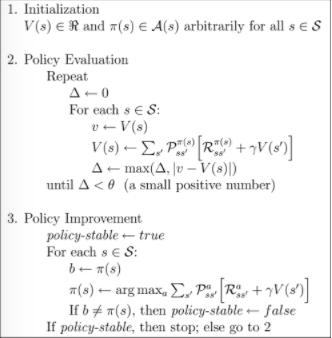